In [86]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [87]:
# Reading files
marks= pd.read_csv('nas-pupil-marks.csv')
labels= pd.read_csv('nas-labels.csv')

In [88]:
marks.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [89]:
#Categories
def categorize(subject):
    mark=np.array(marks[subject])
    categories=[]
    for i in mark:
        if i>=85:
            categories.append('HSS')
        elif (i>=70) and (i<85):
            categories.append('GSS')
        elif (i>=55) and (i<70):
            categories.append('ASS')
        elif (i>=40) and (i<55):
            categories.append('BASS')
        elif np.isnan(i):
            categories.append('NaN')
        else:
            categories.append('LSS')
    return categories

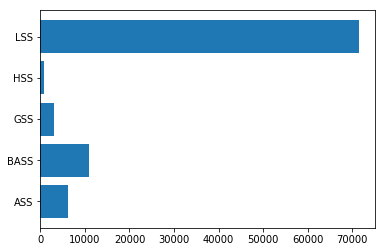

In [90]:
# Performance of students in Maths
plt.barh(np.unique(categorize('Maths %'),return_counts=True)[0][:5],np.unique(categorize('Maths %'),return_counts=True)[1][:5])
marks['Maths_cat']=categorize('Maths %')

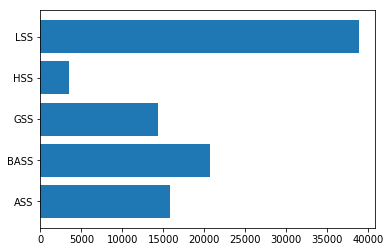

In [91]:
# Performance of students in Reading
plt.barh(np.unique(categorize('Reading %'),return_counts=True)[0][:5],np.unique(categorize('Reading %'),return_counts=True)[1][:5])
marks['Reading_cat']=categorize('Reading %')

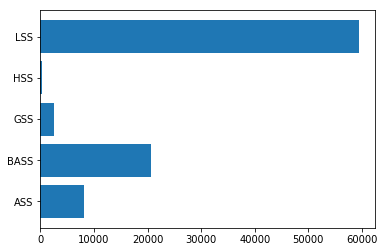

In [92]:
# Performance of students in Science
plt.barh(np.unique(categorize('Science %'),return_counts=True)[0][:5],np.unique(categorize('Science %'),return_counts=True)[1][:5])
marks['Science_cat']=categorize('Science %')

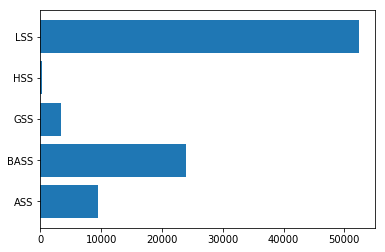

In [93]:
# Performance of students in Social
plt.barh(np.unique(categorize('Social %'),return_counts=True)[0][:5],np.unique(categorize('Social %'),return_counts=True)[1][:5])
marks['Social_cat']=categorize('Social %')

In [94]:
subjects=['Maths %','Reading %','Science %','Social %']
overall=np.array(marks[subjects])
marks['Overall %']=[np.nansum(m)/(4-len(m[np.isnan(m)])) for m in overall]
marks.head()

/home/suyash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Help in household,Maths %,Reading %,Science %,Social %,Maths_cat,Reading_cat,Science_cat,Social_cat,Overall %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,4,20.37,NaN,27.78,NaN,LSS,NaN,LSS,NaN,24.075
1,11011001002,AP,1,2,3,4,2,5,2,2,...,4,12.96,NaN,38.18,NaN,LSS,NaN,LSS,NaN,25.570
2,11011001003,AP,1,2,3,4,2,5,2,1,...,4,27.78,70.00,NaN,NaN,LSS,GSS,NaN,NaN,48.890
3,11011001004,AP,1,2,3,3,2,4,2,1,...,4,NaN,56.67,NaN,36.00,NaN,ASS,NaN,LSS,46.335
4,11011001005,AP,1,2,3,3,2,5,2,1,...,4,NaN,NaN,14.55,8.33,NaN,NaN,LSS,LSS,11.440


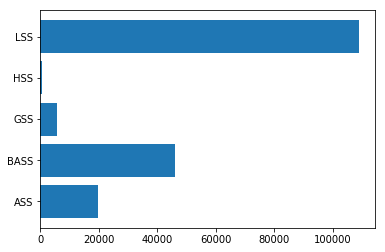

In [95]:
# Overall Performance of students
plt.barh(np.unique(categorize('Overall %'),return_counts=True)[0][:5],np.unique(categorize('Overall %'),return_counts=True)[1][:5])
marks['Overall_cat']=categorize('Overall %')

In [96]:
#Interest in English
marks['inE']=(marks['Read English']+marks['Dictionary to learn']+marks['Answer English WB']+marks['Answer English aloud'])/marks['English is difficult']
#Interest in Maths
marks['inM']=(marks['Solve Maths']+marks['Solve Maths in groups']+marks['Draw geometry'])+(marks['Give Math HW']/4)/marks['Maths is difficult']
#Interest in Science
marks['inSci']=(marks['Solve science problems']+marks['Conduct experiments']+marks['Observe experiments']+marks['Express science views'])+(marks['Give Scie HW']/4)/marks['Science is difficult']
#Interest in Social Science
marks['inSo']=(marks['Participate in SocSci']+marks['Express SocSci views']+marks['Small groups in SocSci']+marks['Historical excursions']+(marks['Give SoSc HW']/4))/marks['SocSci is difficult']

In [99]:
cols=[ u'State', u'Gender', u'Age', 
       u'Siblings', u'Handicap', u'Father edu',
       u'Mother edu', u'Father occupation', u'Mother occupation',
       u'Below poverty', u'Use calculator', u'Use Internet',
       u'Use dictionary', u'# Books', u'Distance',
       u'Computer use', u'Library use', u'Like school',
       u'Correct Lang HW', u'Correct Math HW', u'Correct Scie HW',
       u'Correct SocS HW', u'Help in Study', u'Private tuition',
       u'English is difficult', u'Read English', u'Dictionary to learn',
       u'Answer English WB', u'Answer English aloud', u'Maths is difficult',
       u'Solve Maths', u'Solve Maths in groups', u'Draw geometry',
       u'Explain answers', u'SocSci is difficult', u'Historical excursions',
       u'Participate in SocSci', u'Small groups in SocSci',
       u'Express SocSci views', u'Science is difficult',
       u'Observe experiments', u'Conduct experiments',
       u'Solve science problems', u'Express science views', u'Watch TV',
       u'Play games', u'Help in household','inM','inE','inSci','inSo',
       u'Maths_cat', u'Reading_cat', u'Science_cat', u'Social_cat',
       u'Overall_cat']

In [100]:
marks_model=marks[cols].copy()
marks_model.head()

,State,Gender,Age,Siblings,Handicap,Father edu,Mother edu,Father occupation,Mother occupation,Below poverty,...,Help in household,inM,inE,inSci,inSo,Maths_cat,Reading_cat,Science_cat,Social_cat,Overall_cat
0,AP,1,3,5,2,1,1,3,3,0,...,4,6.500,3.666667,12.375000,11.750000,LSS,NaN,LSS,NaN,LSS
1,AP,2,3,5,2,2,1,7,3,0,...,4,8.375,4.000000,12.333333,4.333333,LSS,NaN,LSS,NaN,LSS
2,AP,2,3,5,2,1,1,0,3,0,...,4,8.000,3.333333,12.000000,4.000000,LSS,GSS,NaN,NaN,BASS
3,AP,2,3,4,2,1,1,3,3,0,...,4,8.375,4.000000,12.333333,4.333333,NaN,ASS,NaN,LSS,BASS
4,AP,2,3,5,2,1,1,3,3,0,...,4,7.375,4.000000,12.333333,13.000000,NaN,NaN,LSS,LSS,LSS


In [101]:
#Predicting Category of Maths %
df=pd.get_dummies(data=marks_model,columns=cols[:51],dummy_na=False)
df.head()

,Maths_cat,Reading_cat,Science_cat,Social_cat,Overall_cat,State_AN,State_AP,State_AR,State_BR,State_CG,...,inSo_11.0,inSo_11.25,inSo_11.5,inSo_11.75,inSo_12.0,inSo_12.25,inSo_12.5,inSo_12.75,inSo_13.0,inSo_inf
0,LSS,NaN,LSS,NaN,LSS,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,LSS,NaN,LSS,NaN,LSS,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LSS,GSS,NaN,NaN,BASS,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,ASS,NaN,LSS,BASS,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,LSS,LSS,LSS,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [105]:
# Random Forest Classification model
def cls(trainX,trainY,testX,testY):
    model=RandomForestClassifier(n_estimators=1000)
    model.fit(trainX,trainY)
    pred=model.predict(testX)
    print accuracy_score(pred,testY)

In [106]:
def run(df,label):
    from sklearn.cross_validation import train_test_split
    trainX,testX,trainY,testY= train_test_split(df.iloc[:,5:],df[label],test_size=0.35,random_state=21)
    cls(trainX,trainY,testX,testY)

In [107]:
# For Maths
df2=df.loc[df['Maths_cat']!='NaN'].copy()
run(df2,'Maths_cat')

0.7779524646259133


In [84]:
df2=df.loc[df['Science_cat']!='NaN'].copy()
run(df2,'Science_cat')

0.6624277819643306
